In [1]:
import seaborn as sns
# 붓꽃 데이터셋 로딩
iris=sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [2]:
iris.info() # 데이터셋의 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# 품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:, 4].values # 종속변수
print(y[:5])

encoder=LabelEncoder()
y1=encoder.fit_transform(y) # 스트링을 숫자로 변환
print(y1[:5])
y2=pd.get_dummies(y1).values # 종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [5]:
from sklearn.model_selection import train_test_split
# 학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test=train_test_split(X, y2, test_size=0.2, stratify=y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
# 모델 생성
model=Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 모델 학습
hist=model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.1451 - accuracy: 0.2667
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9983 - accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9058 - accuracy: 0.6583
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.6750
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.7250
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.8083
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.8583
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5684 - accuracy: 0.8750
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.8500
Epoch 11/100
4/4 [===========

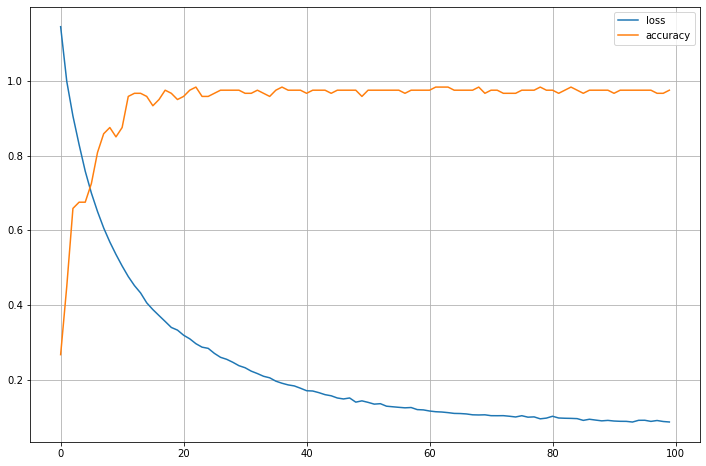

In [8]:
import matplotlib.pyplot as plt
# 그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [10]:
# 모델 평가
loss, accuracy=model.evaluate(X_test, y_test, verbose=0)
print(f"정확도 : {accuracy:.2f}")

정확도 : 1.00


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
print(pred[:10])
y_test_class=np.argmax(y_test, axis=1)
pred_class=np.argmax(pred, axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class, pred_class))

[[1.0811163e-03 8.3053529e-01 1.6838355e-01]
 [9.9104542e-01 8.9543611e-03 2.4775940e-07]
 [5.2191340e-04 5.1498634e-01 4.8449177e-01]
 [7.6283504e-05 2.8707996e-01 7.1284378e-01]
 [1.9590558e-02 9.7232360e-01 8.0858255e-03]
 [4.8872430e-06 4.6200056e-02 9.5379502e-01]
 [9.9199390e-01 8.0055799e-03 4.7038185e-07]
 [9.6290296e-07 9.3637118e-03 9.9063534e-01]
 [4.5199985e-07 7.9330839e-03 9.9206638e-01]
 [9.9914682e-01 8.5321203e-04 2.2381401e-09]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [12]:
model.save('d:/data/iris/iris_keras.model')

INFO:tensorflow:Assets written to: d:/data/iris/iris_keras.model\assets
